数据清洗流程：

1、缺失值处理：识别并填补缺失值，或删除含缺失值的行/列。

2、重复数据处理：检查并删除重复数据，确保每条数据唯一。

3、异常值处理：识别并处理异常值，如极端值、错误值。

4、数据格式转换：转换数据类型或进行单位转换，如日期格式转换。

5、标准化与归一化：对数值型数据进行标准化（如 Z-score）或归一化（如 Min-Max）。

6、类别数据编码：将类别变量转换为数值形式，常见方法包括 One-Hot 编码和标签编码。

7、文本处理：对文本数据进行清洗，如去除停用词、词干化、分词等。

8、数据抽样：从数据集中抽取样本，或通过过采样/欠采样处理类别不平衡。

9、特征工程：创建新特征、删除不相关特征、选择重要特征等。



In [1]:
import pandas as pd
import os

os.getcwd()
# 数据读取
# 读取csv时常用header设置标题行(默认为0，有时设置为None);names设置列名;skiprows通过指定行数;nrows读取前几行;na_values将哪些数据视为空值
data = pd.read_csv("property-data.csv", sep=",", encoding='utf-8', na_values=['n/a', 'NA', '--', 'na']) # 默认空值为n/a和NA
print(data.columns)

Index(['PID', 'ST_NUM', 'ST_NAME', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH',
       'SQ_FT'],
      dtype='object')


如果我们要删除包含空字段的行，可以使用 dropna() 方法，语法格式如下：

DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

参数表示：

axis：默认为 0，表示逢空值剔除整行，如果设置参数 axis＝1 表示逢空值去掉整列。

how：默认为 'any' 如果一行（或一列）里任何一个数据有出现 NA 就去掉整行，如果设置 how='all' 一行（或列）都是 NA 才去掉这整行。

thresh：设置需要多少非空值的数据才可以保留下来的。

subset：设置想要检查的列。如果是多个列，可以使用列名的 list 作为参数。

inplace：如果设置 True，将计算得到的值直接覆盖之前的值并返回 None，修改的是源数据。

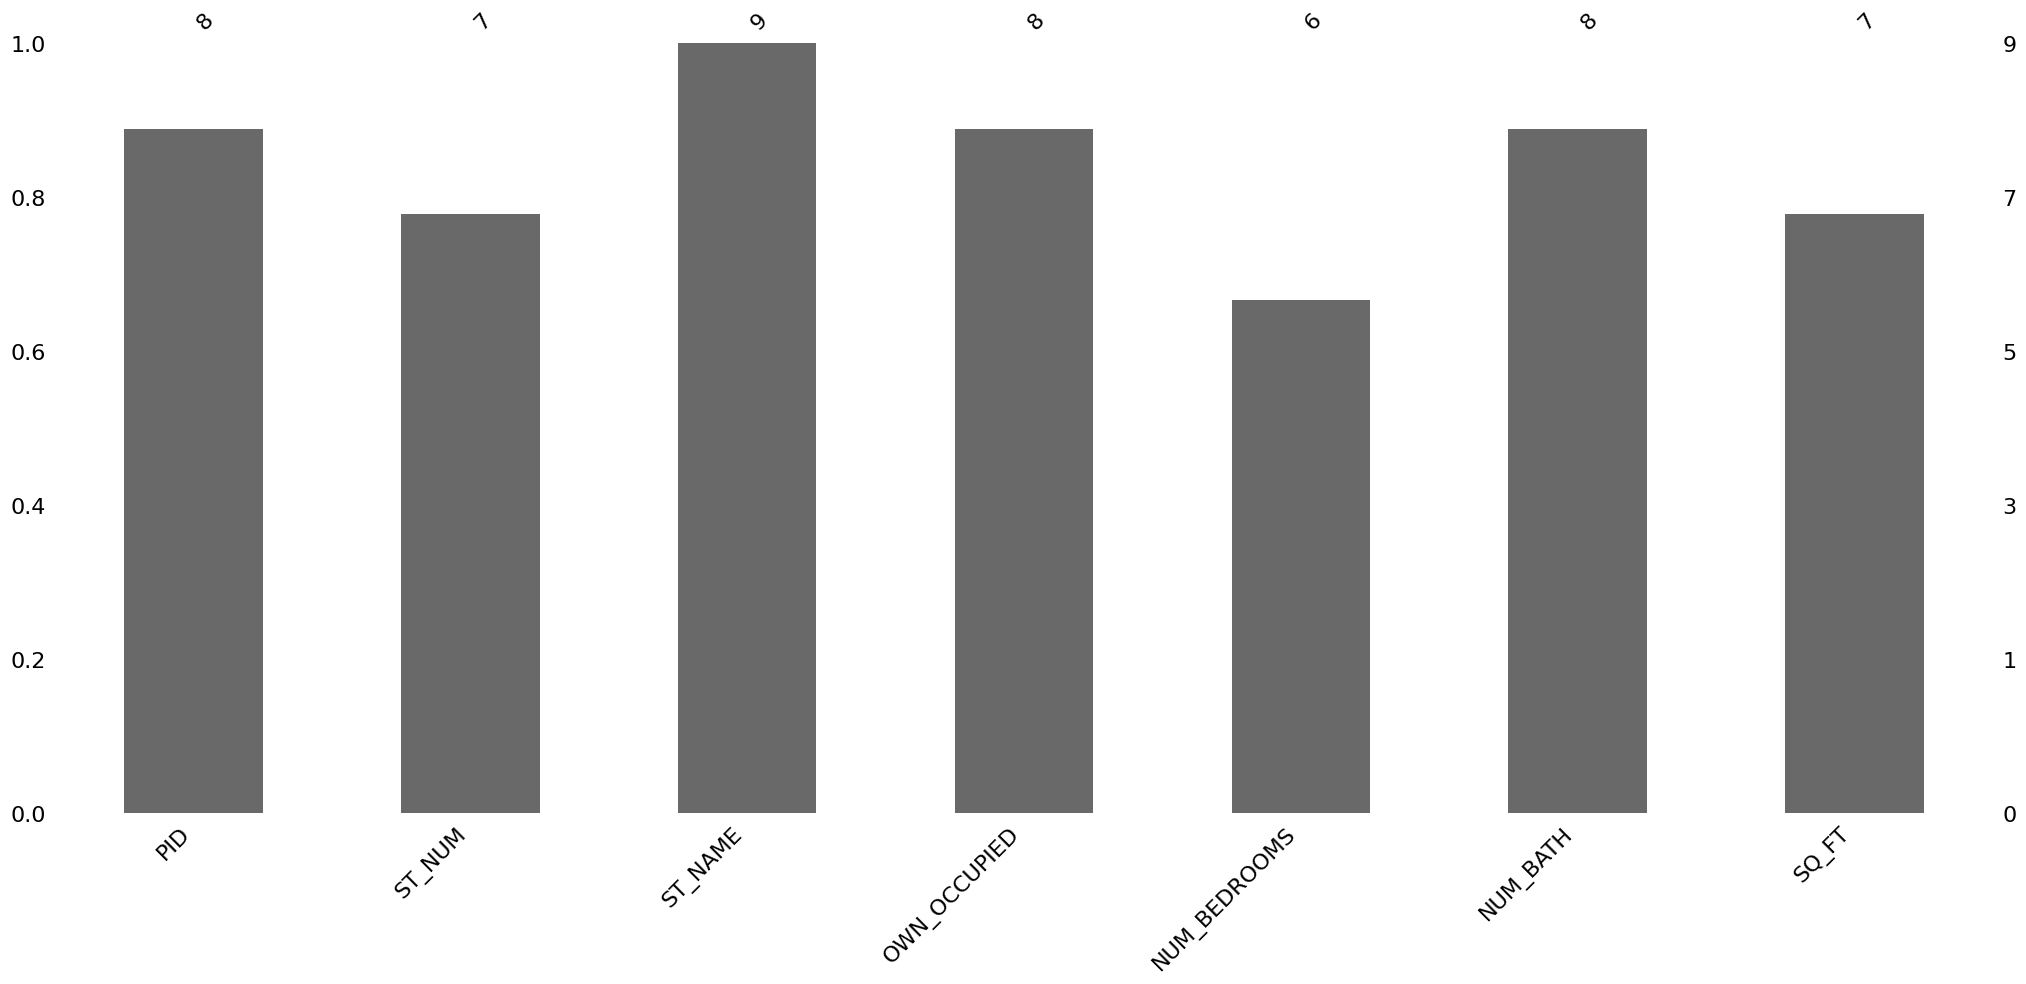

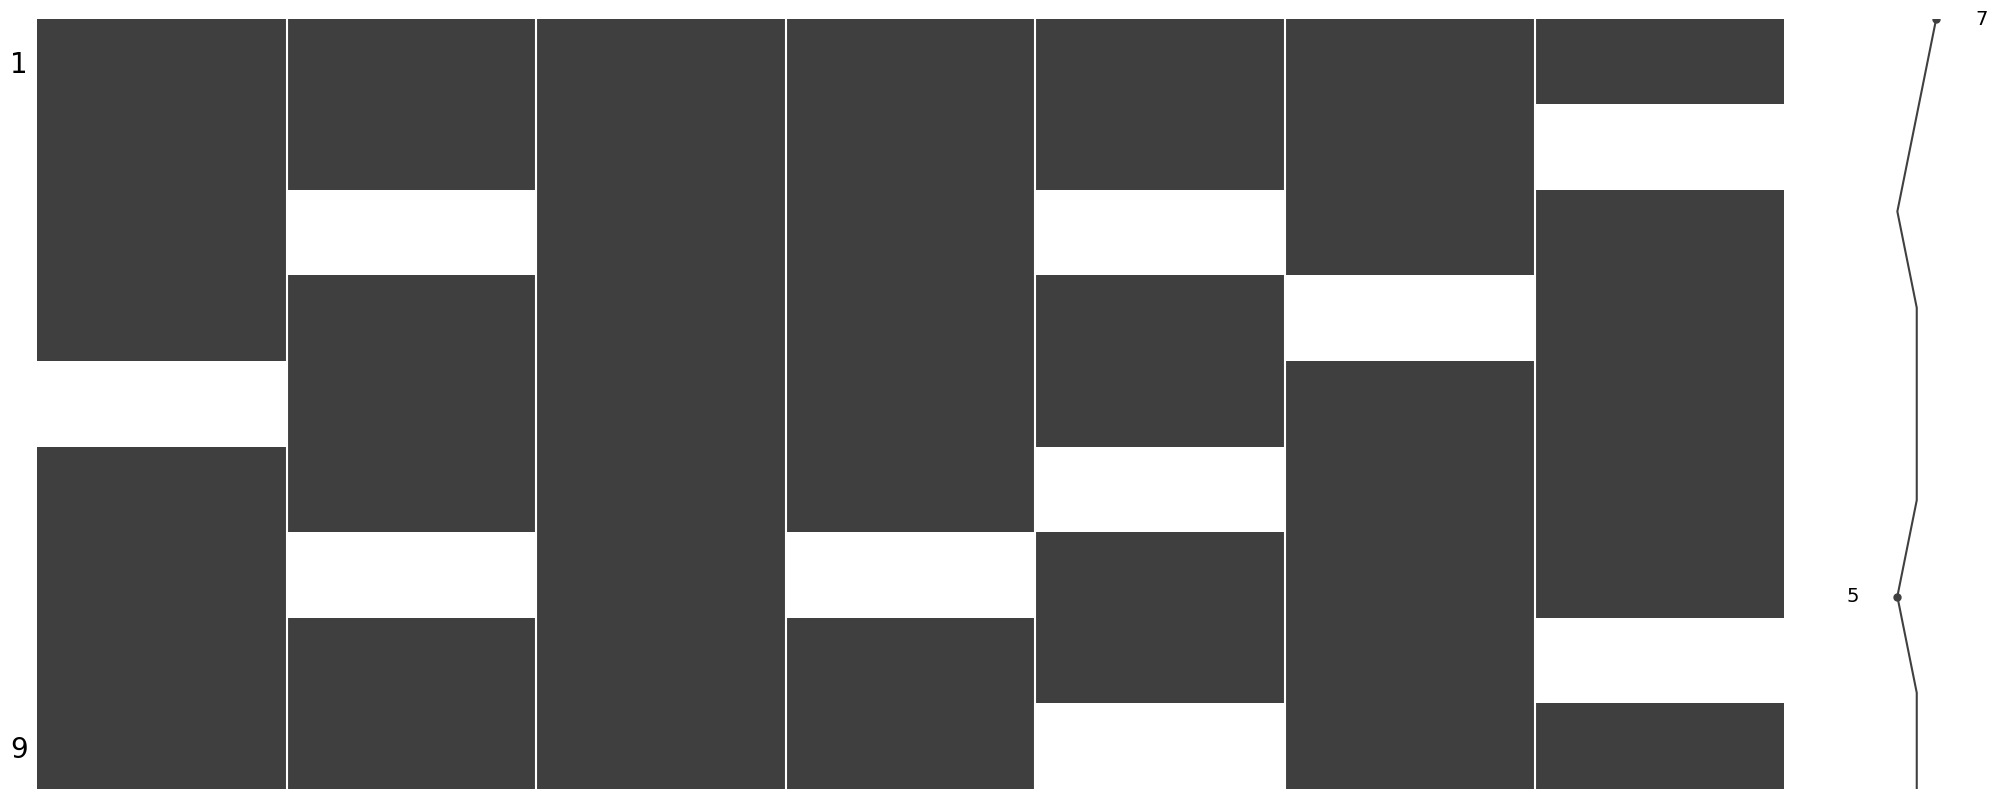

In [6]:
# 空值处理

# 空值可视化
# 使用missingno包可以对空值的数量与分布进行可视化
import missingno as msn
msn.bar(data)
msn.matrix(data, labels = False, label_rotation = 90)

# 删除所有特征均为空的记录
data.dropna(how='all', inplace=True)

# 删除id为空的记录
data.dropna(subset='PID', inplace=True)

In [3]:
# 重复值处理